In [101]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation
from pymoo.termination import get_termination
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

In [102]:
df_ads = pd.read_csv('preprocessed_ads.csv')
df_moderator_clean = pd.read_csv('preprocessed_moderator_clean.csv')
df_moderator_anomaly = pd.read_csv('preprocessed_moderator_anomaly.csv')

In [103]:
def ad_scoring(data, w1, w2):
    data['ad_score'] = w1 * data['scaled_punish_num'] + w2 * data['scaled_avg_ad_revenue']
    data_sorted = data.sort_values(by='ad_score', ascending=False)
    return data_sorted

def moderator_scoring(data, v1, v2):
    data['moderator_score'] = v1 * data['scaled_reciprocal_handling_time'] + v2 * data['accuracy']
    data_sorted = data.sort_values(by='moderator_score', ascending=False)
    return data_sorted

In [104]:
df_ranked_ads = ad_scoring(df_ads, 0.5, 0.5)
df_ranked_ads

,ad_id,delivery_country,punish_num,avg_ad_revenue,scaled_punish_num,scaled_avg_ad_revenue,ad_score
11,1765089254920220,JP,16.0,23.7129,1.0,0.001383,0.500692
10,1764585402541070,JP,16.0,23.7129,1.0,0.001383,0.500692
16,1767664297196540,JP,16.0,23.7129,1.0,0.001383,0.500692
15,1767664297198600,JP,16.0,23.7129,1.0,0.001383,0.500692
12,1765121170665500,JP,16.0,23.7129,1.0,0.001383,0.500692
...,...,...,...,...,...,...,...
23408,1773545644180480,MY,0.0,0.0000,0.0,0.000000,0.000000
26440,1773564116748290,NL,0.0,0.0000,0.0,0.000000,0.000000
18990,1773528822210560,AR,0.0,0.0000,0.0,0.000000,0.000000
26432,1773486190435320,AE,0.0,0.0000,0.0,0.000000,0.000000


In [105]:
df_ranked_moderators_clean = moderator_scoring(df_moderator_clean, 0.5, 0.5)
df_ranked_moderators_clean

,moderator,Productivity,Utilisation %,handling time,reciprocal_handling_time,scaled_reciprocal_handling_time,accuracy,EC,KR,NZ,...,MX,OTHER,CH,QA,PE,IE,DZ,BE,KZ,moderator_score
806,1695311101589506,2.2800,1.045104,104,0.009615,0.701921,0.975,0,0,0,...,0,0,0,0,0,0,0,0,0,0.838460
1246,1598527,1.2300,0.000000,73,0.013699,1.000000,0.676,0,0,0,...,0,0,0,0,0,0,0,0,0,0.838000
1147,7167613,0.5400,0.000000,99,0.010101,0.737372,0.556,0,0,0,...,0,0,0,0,0,1,0,0,0,0.646686
1208,6092503,13.4600,0.006313,180,0.005556,0.405551,0.757,0,0,0,...,0,0,1,0,0,0,0,0,0,0.581275
459,7579980,5.3500,0.000000,172,0.005814,0.424414,0.667,0,0,0,...,0,0,0,0,0,0,0,0,0,0.545707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,9759789,173.1450,0.208323,13220,0.000076,0.005514,0.353,0,0,0,...,0,0,0,0,0,1,0,0,0,0.179257
1075,8587001,197.5175,0.395641,76544,0.000013,0.000946,0.340,0,0,0,...,0,0,0,0,0,0,0,0,0,0.170473
943,5082099,189.4125,0.530099,538082,0.000002,0.000128,0.316,0,0,0,...,0,0,0,0,0,0,0,0,0,0.158064
1228,9020538,125.2900,0.000000,30487,0.000033,0.002387,0.250,0,0,0,...,0,0,0,0,0,0,0,0,0,0.126193


In [106]:
df_ranked_moderators_anomaly = moderator_scoring(df_moderator_anomaly, 0.5, 0.5)
df_ranked_moderators_anomaly

,moderator,Productivity,Utilisation %,handling time,reciprocal_handling_time,scaled_reciprocal_handling_time,accuracy,EC,KR,NZ,...,MX,OTHER,CH,QA,PE,IE,DZ,BE,KZ,moderator_score
90,5581253,92.835000,0.254167,14774,0.000068,1.000000,0.894,0,0,0,...,0,0,0,0,0,0,0,0,0,0.947000
134,1695027913818113,147.020000,0.335302,25186,0.000040,0.530446,0.894,0,0,0,...,0,0,0,0,0,0,0,0,0,0.712223
22,1694555598292994,46.386087,0.196601,29984,0.000033,0.423831,0.894,0,0,0,...,0,0,0,0,0,0,0,0,0,0.658916
47,2796851,26.285000,0.634344,36862,0.000027,0.319407,0.894,0,0,0,...,0,0,0,0,0,0,0,0,1,0.606703
86,3778633,107.352500,0.329443,42022,0.000024,0.263508,0.894,0,0,0,...,0,0,0,0,0,0,0,0,0,0.578754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,6858011,344.712500,0.779906,85868,0.000012,0.059602,0.500,0,0,0,...,0,0,0,0,0,1,0,0,0,0.279801
18,3561577,344.712500,0.779906,85868,0.000012,0.059602,0.500,0,0,0,...,0,0,0,0,0,1,0,0,0,0.279801
129,1769313472273426,344.712500,0.779906,85868,0.000012,0.059602,0.486,0,0,0,...,0,0,0,0,0,0,0,0,0,0.272801
25,2379151,344.712500,0.779906,85868,0.000012,0.059602,0.415,0,0,0,...,0,0,0,0,0,0,0,0,0,0.237301


In [107]:
df_ranked_moderators = pd.concat([df_ranked_moderators_clean, df_ranked_moderators_anomaly])

In [108]:
def matching(ad_data, mod_data):
    matched_data = []

    # Convert the dataframes to dictionaries for faster access
    ad_data_dict = ad_data.to_dict('index')
    mod_data_dict = mod_data.reset_index(drop=True).to_dict('index')

    # Create a dictionary to store the assignment information for each moderator
    mod_assignment_info = {i: {'assigned_ad_ids': [], 
                               'total_avg_ad_revenue': 0, 
                               'total_punish_num': 0, 
                               'productivity_left': mod_data_dict[i]['Productivity']} 
                          for i in mod_data_dict}

    # Start the matching process
    for ad_index in ad_data_dict:
        ad_row = ad_data_dict[ad_index]
        for mod_index in mod_data_dict:
            mod_row = mod_data_dict[mod_index]
            if mod_row[ad_row['delivery_country']] == 1 and mod_assignment_info[mod_index]['productivity_left'] >= 1:
                mod_assignment_info[mod_index]['assigned_ad_ids'].append(ad_row['ad_id'])
                mod_assignment_info[mod_index]['total_avg_ad_revenue'] += ad_row['avg_ad_revenue']
                mod_assignment_info[mod_index]['total_punish_num'] += ad_row['punish_num']
                mod_assignment_info[mod_index]['productivity_left'] = math.floor(mod_assignment_info[mod_index]['productivity_left'] - 1)
                break

    # Create the output data
    for mod_index in mod_data_dict:
        mod_row = mod_data_dict[mod_index]
        mod_info = mod_assignment_info[mod_index]
        matched_data.append({'Moderator': mod_row['moderator'],
                             'Assigned Ad IDs': mod_info['assigned_ad_ids'],
                             'Accuracy': mod_row['accuracy'],
                             'Handling Time': mod_row['handling time'],
                             'Total Avg Ad Revenue': mod_info['total_avg_ad_revenue'],
                             'Total Punish Num': mod_info['total_punish_num']})

    # Create and return the output dataframe
    output_df = pd.DataFrame(matched_data)
    return output_df


In [109]:
df_matched = matching(df_ranked_ads, df_ranked_moderators)
df_matched

,Moderator,Assigned Ad IDs,Accuracy,Handling Time,Total Avg Ad Revenue,Total Punish Num
0,1695311101589506,"[1773531518222360, 1773293685750830]",0.975,104,1551.9950,2.0
1,1598527,[1769826449034250],0.676,73,17144.4986,0.0
2,7167613,[],0.556,99,0.0000,0.0
3,6092503,"[1770501606335480, 1769433242777640, 176943324...",0.757,180,9517.7408,14.0
4,7579980,"[1773552389861390, 1773552155744300, 176739236...",0.667,172,77.8961,20.0
...,...,...,...,...,...,...
1409,6858011,[],0.500,85868,0.0000,0.0
1410,3561577,[],0.500,85868,0.0000,0.0
1411,1769313472273426,[],0.486,85868,0.0000,0.0
1412,2379151,[],0.415,85868,0.0000,0.0


In [110]:
def calculate_objective_values(matched_data):
    # Calculating the estimated revenue rate and riskiness for each assignment (moderator)
    matched_data['Estimated Revenue Rate'] = (matched_data['Accuracy'] * matched_data['Total Avg Ad Revenue']) / matched_data['Handling Time']
    matched_data['Estimated Riskiness'] = (1 - matched_data['Accuracy']) * matched_data['Total Punish Num']
    
    # Summing up the individual estimated revenue rates and riskiness to get the total values
    total_estimated_revenue_rate = matched_data['Estimated Revenue Rate'].sum()
    total_estimated_riskiness = matched_data['Estimated Riskiness'].sum()
    
    return total_estimated_revenue_rate, total_estimated_riskiness

In [111]:
total_estimated_revenue_rate, total_estimated_riskiness = calculate_objective_values(df_matched)
print(total_estimated_revenue_rate, total_estimated_riskiness)

235.41979026880227 39.571000000000005


## NSGA-II: Non-dominated Sorting Genetic Algorithm

In [112]:
class AdModerationOptimizationProblem(Problem):

    def __init__(self, ad_data, mod_data_clean, mod_data_anomaly, calculate_objective_values):
        super().__init__(n_var=4, 
                         n_obj=2, 
                         n_constr=0, 
                         xl=np.array([0, 0, 0, 0]), 
                         xu=np.array([1, 1, 1, 1]),
                         elementwise_evaluation=True)  # Add this line to enable element-wise evaluation
        self.ad_data = ad_data
        self.mod_data_clean = mod_data_clean
        self.mod_data_anomaly = mod_data_anomaly
        self.calculate_objective_values = calculate_objective_values

    def _evaluate(self, x, out, *args, **kwargs):
        F = []
        for individual in x:
            # Get the weights from the individual
            w1, w2, v1, v2 = individual

            # Score the ads using the weights
            ranked_ads = ad_scoring(self.ad_data, w1, w2)
            
            # Score the moderators (clean and anomaly data) using the weights
            ranked_moderators_clean = moderator_scoring(self.mod_data_clean, v1, v2)
            ranked_moderators_anomaly = moderator_scoring(self.mod_data_anomaly, v1, v2)
            
            # Concatenate the ranked moderators data
            ranked_moderators = pd.concat([ranked_moderators_clean, ranked_moderators_anomaly])

            # Match the ads with the moderators
            matched_data = matching(ranked_ads, ranked_moderators)
            
            # Calculate the objective values
            total_estimated_revenue_rate, total_estimated_riskiness = self.calculate_objective_values(matched_data)
            
            F.append([total_estimated_revenue_rate, total_estimated_riskiness])

        # Set the objective values in the output
        out["F"] = np.array(F)


In [113]:
# Intialising an instance of the problem

problem = AdModerationOptimizationProblem(ad_data=df_ads, 
                                          mod_data_clean=df_moderator_clean, 
                                          mod_data_anomaly=df_moderator_anomaly, 
                                          calculate_objective_values=calculate_objective_values)

# Defining the algorithm
algorithm = NSGA2(pop_size=50)


Running the optimisation

In [114]:
res = minimize(problem,
               algorithm,
               ('n_gen', 10),
               seed=1,
               save_history=True,
               verbose=True)


n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       50 |      2 |             - |             -
     2 |      100 |      4 |  0.000000E+00 |             f
     3 |      150 |     13 |  0.000000E+00 |             f
     4 |      200 |     36 |  0.000000E+00 |             f
     5 |      250 |     50 |  0.000000E+00 |             f
     6 |      300 |     50 |  0.000000E+00 |             f
     7 |      350 |     50 |  0.000000E+00 |             f
     8 |      400 |     50 |  0.000000E+00 |             f
     9 |      450 |     50 |  0.000000E+00 |             f
    10 |      500 |     50 |  0.000000E+00 |             f


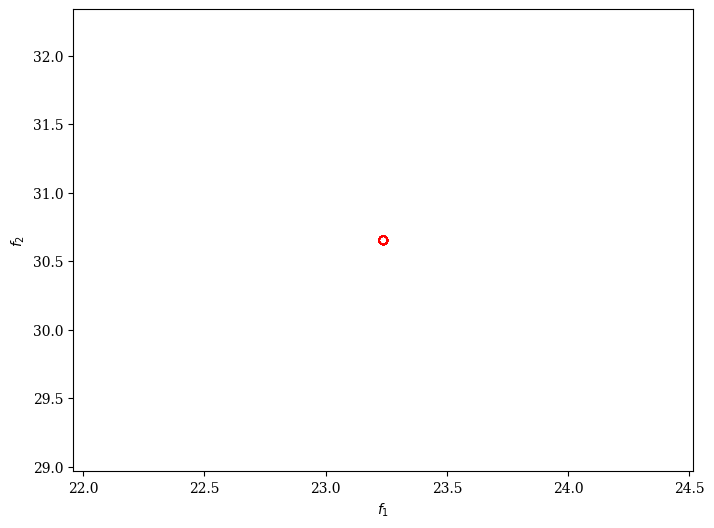

In [115]:
plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()


OG one

In [116]:
# def matching(ad_data, mod_data):
#     matched_data = []
    
#     # Create a dictionary to store the assignment information for each moderator
#     mod_assignment_info = {}
#     for index, mod_row in mod_data.iterrows():
#         mod_assignment_info[mod_row['moderator']] = {
#             'assigned_ad_ids': [],
#             'accuracy': mod_row['accuracy'],
#             'handling_time': mod_row['handling time'],
#             'total_avg_ad_revenue': 0,
#             'total_punish_num': 0,
#             'productivity_left': mod_row['Productivity']  # Track the remaining productivity for each moderator
#         }
    
#     # Start the matching process
#     for index, ad_row in ad_data.iterrows():
#         for mod_index, mod_row in mod_data.iterrows():
#             # Check if the ad's delivery country matches with moderator's market expertise 
#             # and the moderator has some productivity left
#             if mod_row[ad_row['delivery_country']] == 1 and mod_assignment_info[mod_row['moderator']]['productivity_left'] > 1:
                
#                 # Assign the ad to the moderator
#                 mod_assignment_info[mod_row['moderator']]['assigned_ad_ids'].append(ad_row['ad_id'])
                
#                 # Update the total average ad revenue and total punish number for the moderator
#                 mod_assignment_info[mod_row['moderator']]['total_avg_ad_revenue'] += ad_row['avg_ad_revenue']
#                 mod_assignment_info[mod_row['moderator']]['total_punish_num'] += ad_row['punish_num']
                
#                 # Decrease the productivity left for the moderator
#                 mod_assignment_info[mod_row['moderator']]['productivity_left'] -= 1
                
#                 # If the moderator has insufficient productivity left, remove them from the pool
#                 if mod_assignment_info[mod_row['moderator']]['productivity_left'] < 1:
#                     mod_data.drop(mod_index, inplace=True)
                
#                 # Break the loop as the ad has been assigned
#                 break
                
#     # Create the output data
#     for mod_id, mod_info in mod_assignment_info.items():
#         matched_data.append({
#             'Moderator': mod_id,
#             'Assigned Ad IDs': mod_info['assigned_ad_ids'],
#             'Accuracy': mod_info['accuracy'],
#             'Handling Time': mod_info['handling_time'],
#             'Total Avg Ad Revenue': mod_info['total_avg_ad_revenue'],
#             'Total Punish Num': mod_info['total_punish_num']
#         })
    
#     # Create and return the output dataframe
#     output_df = pd.DataFrame(matched_data)
#     return output_df